### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In C:\Users\Abhijit Tripathy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Abhijit Tripathy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Abhijit Tripathy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Abhijit Tripathy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Abhijit Tripathy\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### Importing the required data

In [2]:
# importing all the data
campaign_data = pd.read_csv('cupon_redemption/campaign_data.csv')
coupon_item_mapping = pd.read_csv('cupon_redemption/coupon_item_mapping.csv')
customer_demographics = pd.read_csv('cupon_redemption/customer_demographics.csv')
customer_transaction_data = pd.read_csv('cupon_redemption/customer_transaction_data.csv')
item_data = pd.read_csv('cupon_redemption/item_data.csv')
train_data = pd.read_csv('cupon_redemption/train.csv') 
test_data = pd.read_csv('cupon_test.csv')

### Checking each data table

In [3]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [4]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [5]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [6]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [7]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [8]:
train_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [9]:
test_data.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


### Preparing data for the model

In [10]:
#definning a new dataframe as a copy of train_data
data = train_data

In [11]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [12]:
# definning a function to map all the table values into one table
def add_column(column_key,column_name,table_name):
    data[column_name]= data[column_key].map(table_name.set_index(column_key)[column_name])

# defining a function to map values explicitly from one table to other
def add_column_explicit(column_key,column_name,table_name):
    mapping = dict(table_name[[column_key, column_name]].values)
    data[column_name] = data[column_key].map(mapping)

In [13]:
add_column('campaign_id','campaign_type',campaign_data)
add_column('campaign_id','start_date',campaign_data)
add_column('campaign_id','end_date',campaign_data)
add_column('campaign_id','end_date',campaign_data)
add_column('customer_id','age_range',customer_demographics)
add_column('customer_id','marital_status',customer_demographics)
add_column('customer_id','rented',customer_demographics)
add_column('customer_id','family_size',customer_demographics)
add_column('customer_id','no_of_children',customer_demographics)
add_column('customer_id','income_bracket',customer_demographics)

In [14]:
add_column_explicit('customer_id','item_id',customer_transaction_data)
add_column_explicit('customer_id','date',customer_transaction_data)
add_column_explicit('customer_id','quantity',customer_transaction_data)
add_column_explicit('customer_id','selling_price',customer_transaction_data)
add_column_explicit('customer_id','other_discount',customer_transaction_data)
add_column_explicit('customer_id','coupon_discount',customer_transaction_data)
add_column_explicit('item_id','brand',item_data)
add_column_explicit('item_id','brand_type',item_data)
add_column_explicit('item_id','category',item_data)

In [15]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,NaN,...,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,Local,Fuel
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,...,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,Established,Meat
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,...,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,Established,Grocery
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,...,NaN,29771,2013-06-19,1,78.01,0.00,0.0,56,Local,Grocery
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,...,3.0,46442,2013-07-02,2,106.86,0.00,0.0,4700,Established,Packaged Meat


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 23 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
age_range            43661 non-null object
marital_status       25394 non-null object
rented               43661 non-null float64
family_size          43661 non-null object
no_of_children       14056 non-null object
income_bracket       43661 non-null float64
item_id              78369 non-null int64
date                 78369 non-null object
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
brand                78369 non-nu

#### Cleaning the data by filling NaN

In [17]:
data['age_range'].mode()

0    46-55
dtype: object

In [18]:
data['age_range'].fillna('46-55',inplace=True)

In [19]:
data['age_range'].isnull().values.any()

False

In [20]:
data.groupby('marital_status').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,rented,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
marital_status,,,,,,,,,,,,,,,,,,,,,
Married,18811,18811,18811,18811,18811,18811,18811,18811,18811,18811,...,18811,18811,18811,18811,18811,18811,18811,18811,18811,18811
Single,6583,6583,6583,6583,6583,6583,6583,6583,6583,6583,...,6583,6583,6583,6583,6583,6583,6583,6583,6583,6583


In [21]:
data['age_range'].fillna('46-55',inplace=True)

In [22]:
data['marital_status'] = data['marital_status'].fillna(pd.Series(np.random.choice(['Married', 'Single'], 
                                                      p=[0.74,0.26], size=len(data))))

In [23]:
data.groupby('rented').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
rented,,,,,,,,,,,,,,,,,,,,,
0.0,41156,41156,41156,41156,41156,41156,41156,41156,41156,41156,...,41156,41156,41156,41156,41156,41156,41156,41156,41156,41156
1.0,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,...,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505


In [24]:
data['rented'] = data['rented'].fillna(pd.Series(np.random.choice([0.0, 1.0], 
                                                      p=[0.94,0.06], size=len(data))))

In [25]:
data.groupby('family_size').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
family_size,,,,,,,,,,,,,,,,,,,,,
1,13612,13612,13612,13612,13612,13612,13612,13612,13612,13612,...,13612,13612,13612,13612,13612,13612,13612,13612,13612,13612
2,16888,16888,16888,16888,16888,16888,16888,16888,16888,16888,...,16888,16888,16888,16888,16888,16888,16888,16888,16888,16888
3,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267,...,6267,6267,6267,6267,6267,6267,6267,6267,6267,6267
4,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,...,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139
5+,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,...,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755


In [26]:
data.groupby('family_size').count()['id']/43661

family_size
1     0.311766
2     0.386798
3     0.143538
4     0.071895
5+    0.086004
Name: id, dtype: float64

In [27]:
data['family_size'] = data['family_size'].fillna(pd.Series(np.random.choice(['1','2','3','4','5+'], 
                                                      p=[0.32,0.39,0.14,0.07,0.08], size=len(data))))

In [28]:
data.groupby('no_of_children').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
no_of_children,,,,,,,,,,,,,,,,,,,,,
1,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540,...,6540,6540,6540,6540,6540,6540,6540,6540,6540,6540
2,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,...,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
3+,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,...,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969


In [29]:
data.groupby('no_of_children').count()['id']/14056

no_of_children
1     0.465282
2     0.252348
3+    0.282371
Name: id, dtype: float64

In [30]:
data['no_of_children'] = data['no_of_children'].fillna(pd.Series(np.random.choice(['1','2','3+'], 
                                                      p=[0.47,0.25,0.28], size=len(data))))

In [31]:
ind = data.groupby('income_bracket').count().index

In [32]:
percents = data.groupby('income_bracket').count()['id']/43661

In [33]:
data['income_bracket'] = data['income_bracket'].fillna(pd.Series(np.random.choice(ind, 
                                                      p=percents, size=len(data))))

In [34]:
#checking the clean data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 23 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
age_range            78369 non-null object
marital_status       78369 non-null object
rented               78369 non-null float64
family_size          78369 non-null object
no_of_children       78369 non-null object
income_bracket       78369 non-null float64
item_id              78369 non-null int64
date                 78369 non-null object
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
brand                78369 non-nu

#### Checking up the correlation heatmap before feature engineering

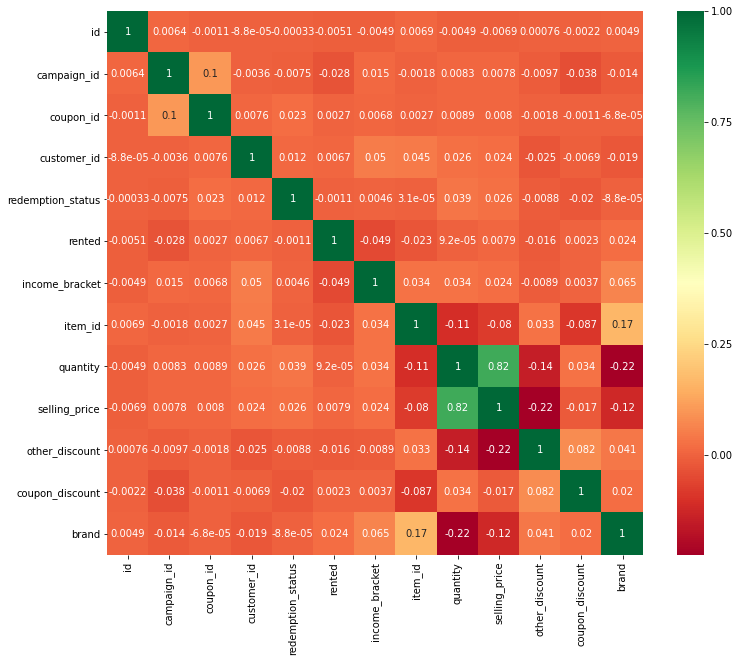

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)

In [36]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Single,...,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,Local,Fuel
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,...,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,Established,Meat
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,...,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,Established,Grocery
3,7,13,644,1050,0,X,19/05/13,05/07/13,46-55,Married,...,1.0,29771,2013-06-19,1,78.01,0.00,0.0,56,Local,Grocery
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,...,3.0,46442,2013-07-02,2,106.86,0.00,0.0,4700,Established,Packaged Meat


### Feature Engineering

##### Campaign Duration Finding

In [37]:
# creating a slice of the main dataframe
ch_data = data[['start_date','end_date']]

In [38]:
ch_data.head()

,start_date,end_date
0,19/05/13,05/07/13
1,19/05/13,05/07/13
2,11/03/13,12/04/13
3,19/05/13,05/07/13
4,16/02/13,05/04/13


In [39]:
# creating columns for starting day and ending day
ser1=[]
ser2=[]
for i in range(len(ch_data)):
    ser1.append(int(ch_data['start_date'][i][:2]))
    ser2.append(int(ch_data['end_date'][i][:2]))

ch_data['start_day'] = ser1
ch_data['end_day'] = ser2

# creating columns for starting month and ending month
mon1=[]
mon2=[]
for i in range(len(ch_data)):
    mon1.append(int(ch_data['start_date'][i][3:5]))
    mon2.append(int(ch_data['end_date'][i][3:5]))

ch_data['start_month'] = mon1
ch_data['end_month'] = mon2

# creating columns for starting year and ending year
year1=[]
year2=[]
for i in range(len(ch_data)):
    year1.append(2000 + int(ch_data['start_date'][i][6:8]))
    year2.append(2000 +int(ch_data['end_date'][i][6:8]))

ch_data['start_year'] = year1
ch_data['end_year'] = year2

In [40]:
# finding the campaign duration using datetime
diff_start = []
diff_end = []
for a,b,c in zip(ch_data['start_day'],ch_data['start_month'],ch_data['start_year']):
    diff_start.append(datetime.datetime(c,b,a))

for a,b,c in zip(ch_data['end_day'],ch_data['end_month'],ch_data['end_year']):
    diff_end.append(datetime.datetime(c,b,a))

diff = []
for x,y in zip(diff_start,diff_end):
    diff.append((y-x).days)
    
# adding the campaign duration column to the main dataframe
data['campaign_duration'] = diff

In [41]:
fix_data = data

#### Binding point

In [42]:
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 24 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
age_range            78369 non-null object
marital_status       78369 non-null object
rented               78369 non-null float64
family_size          78369 non-null object
no_of_children       78369 non-null object
income_bracket       78369 non-null float64
item_id              78369 non-null int64
date                 78369 non-null object
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
brand                78369 non-nu

In [43]:
fix_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Single,...,49009,2013-07-01,6894,481.23,-24.22,0.0,56,Local,Fuel,47
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,...,64341,2013-06-13,1,100.80,0.00,0.0,3512,Established,Meat,47
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,...,30289,2013-06-29,1,35.62,-28.14,0.0,209,Established,Grocery,32
3,7,13,644,1050,0,X,19/05/13,05/07/13,46-55,Married,...,29771,2013-06-19,1,78.01,0.00,0.0,56,Local,Grocery,47
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,...,46442,2013-07-02,2,106.86,0.00,0.0,4700,Established,Packaged Meat,48


In [44]:
fix_data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'start_date', 'end_date', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'item_id', 'date', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'brand', 'brand_type', 'category',
       'campaign_duration'],
      dtype='object')

In [45]:
# performing some data encoding 
fix_data['campaign_type'].replace({'X':0,'Y':1},inplace=True)
fix_data['marital_status'].replace({'Married':0,'Single':1},inplace=True)
fix_data['rented'].replace({0.0:0,1.0:1},inplace=True)
fix_data['family_size'].replace({'1':1,'2':2,'3':3,'4':4,'5+':5},inplace=True)
fix_data['no_of_children'].replace({'1':1,'2':2,'3+':3},inplace=True)
fix_data['brand_type'].replace({'Established':1,'Local':0},inplace=True)

In [46]:
# encoding the category column
len(fix_data.groupby('category').count())

16

In [47]:
# getting out the category index
ind = fix_data.groupby('category').count().index

# creating a dictionary of key and value pair
dic_prop = {}
count = 1
for key in ind:
    dic_prop[key] = count
    count+=1
    
# performing the data encoding
fix_data['category'].replace(dic_prop,inplace=True)

ind2 = fix_data.groupby('age_range').count().index
dic_prop2 = {}
count2 = 1
for key in ind2:
    dic_prop2[key] = count2
    count2+=1
    
# performing the data encoding
fix_data['age_range'].replace(dic_prop2,inplace=True)


In [48]:
# checking out the data 
pd.set_option("display.max_rows", None, "display.max_columns", None)
fix_data.head(3)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration
0,1,13,27,1053,0,0,19/05/13,05/07/13,4,1,0.0,1,3,5.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,0,5,47
1,2,13,116,48,0,0,19/05/13,05/07/13,3,0,0.0,2,2,3.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,1,8,47
2,6,9,635,205,0,1,11/03/13,12/04/13,4,0,0.0,2,1,7.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,1,7,32


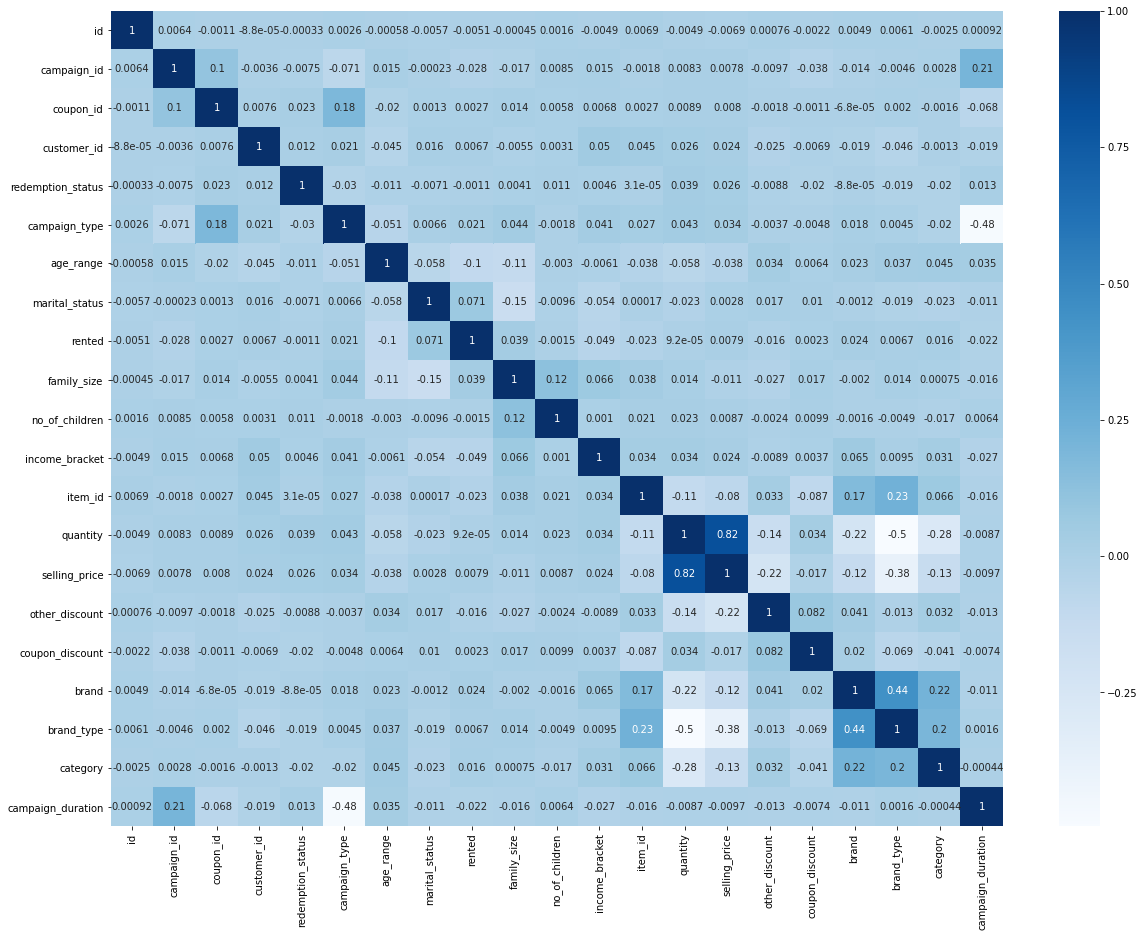

In [49]:
data = fix_data
# plotting a heatmap to check coorelation matrix
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

### Logistic Regression Model Building

In [50]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [51]:
data['income_bracket'] = data['income_bracket']*1000
data['prod_income'] = (abs(data['other_discount'])/data['selling_price']*100)

In [52]:
data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'start_date', 'end_date', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'item_id', 'date', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'brand', 'brand_type', 'category',
       'campaign_duration', 'prod_income'],
      dtype='object')

In [53]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration,prod_income
0,1,13,27,1053,0,0,19/05/13,05/07/13,4,1,0.0,1,3,5000.0,49009,2013-07-01,6894,481.23,-24.22,0.0,56,0,5,47,5.032936
1,2,13,116,48,0,0,19/05/13,05/07/13,3,0,0.0,2,2,3000.0,64341,2013-06-13,1,100.80,0.00,0.0,3512,1,8,47,0.000000
2,6,9,635,205,0,1,11/03/13,12/04/13,4,0,0.0,2,1,7000.0,30289,2013-06-29,1,35.62,-28.14,0.0,209,1,7,32,79.000561
3,7,13,644,1050,0,0,19/05/13,05/07/13,4,0,0.0,4,1,1000.0,29771,2013-06-19,1,78.01,0.00,0.0,56,0,7,47,0.000000
4,9,8,1017,1489,0,0,16/02/13,05/04/13,4,0,0.0,2,1,3000.0,46442,2013-07-02,2,106.86,0.00,0.0,4700,1,11,48,0.000000


In [54]:
X = data[['campaign_type','marital_status','rented','family_size','selling_price','age_range','no_of_children','income_bracket','quantity','brand_type','category','prod_income']]
y = data['redemption_status']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_pred=logreg.predict(X_test)

In [58]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9911956105652673
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [59]:
def roc_curve():
    probability = logreg.predict_proba(X_test)[::,1]
    ping, swing, _ = metrics.roc_curve(y_test,  probability)
    auc = metrics.roc_auc_score(y_test, probability)
    plt.plot(ping,swing,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

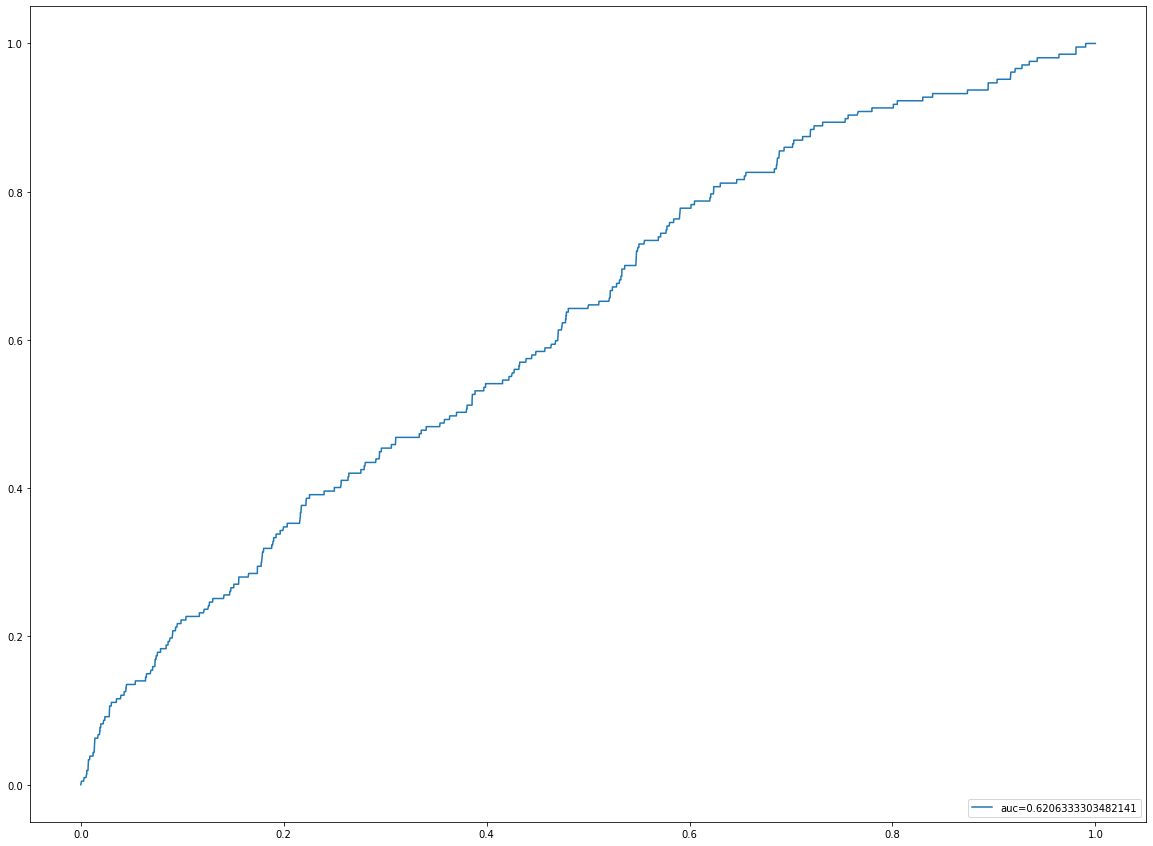

In [60]:
plt.figure(figsize=(20,15))
roc_curve()

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
Dec_tree = DecisionTreeClassifier()

In [63]:
Dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred_dec = Dec_tree.predict(X_test)

In [65]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dec))
print("Precision:",metrics.precision_score(y_test, y_pred_dec))
print("Recall:",metrics.recall_score(y_test,y_pred_dec))
print("F1 Score:",metrics.f1_score(y_test, y_pred_dec))

Accuracy: 0.9890264131683042
Precision: 0.03636363636363636
Recall: 0.00966183574879227
F1 Score: 0.015267175572519083


In [66]:
def roc_curve_dec():
    probability = Dec_tree.predict_proba(X_test)[::,1]
    ping, swing, _ = metrics.roc_curve(y_test,  probability)
    auc = metrics.roc_auc_score(y_test, probability)
    plt.plot(ping,swing,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

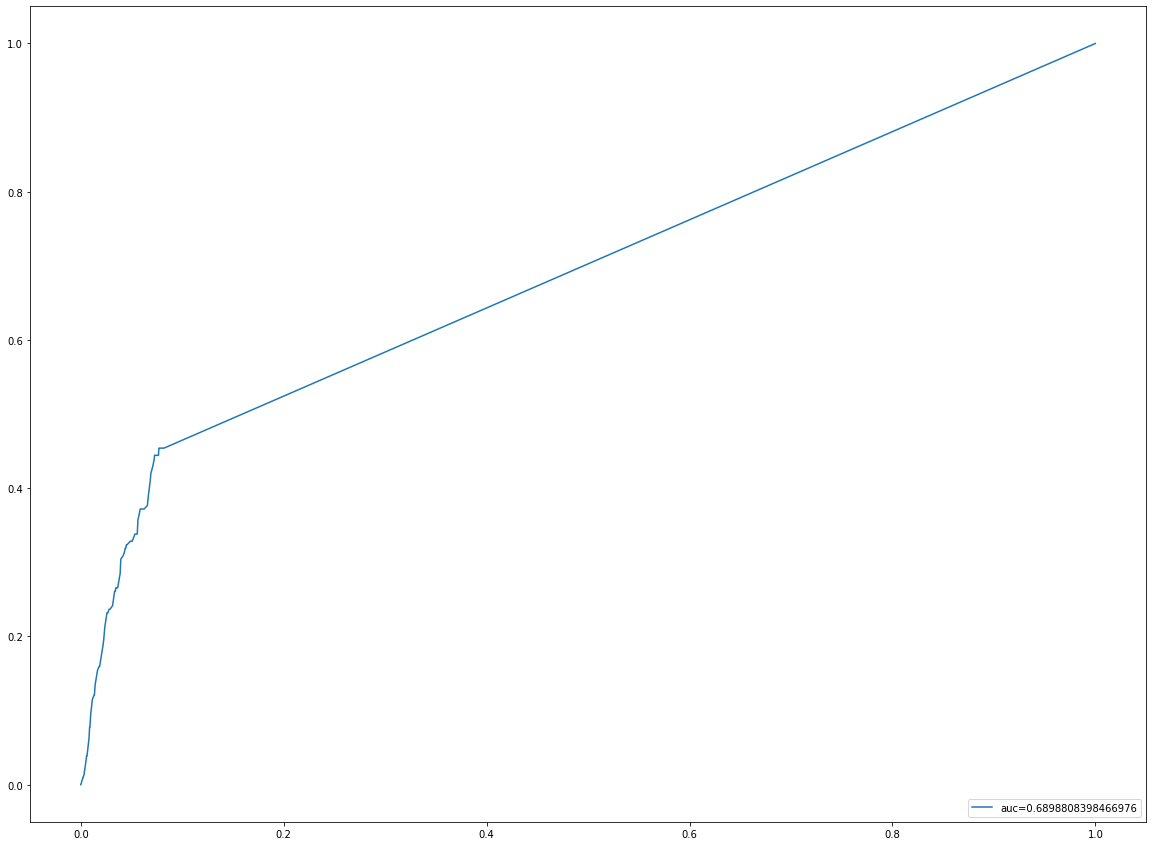

In [67]:
plt.figure(figsize=(20,15))
roc_curve_dec()

SVC(kernel='linear')